In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
import time, sys
from selenium.webdriver.common.action_chains import ActionChains
import csv
import re
from pathlib import Path

class myScraper(object):
	def __init__(self):
		self.csv_file = open(Path("data",'ranks_expense.csv'), 'w', encoding='utf-8', newline='')
		self.writer = csv.writer(self.csv_file)
		self.writer.writerow(['fund_name', 'fund_rank', 'expense_ratio', 'total_assets', 'url'])
		self.patience_time = 20
		self.driver = webdriver.Chrome()
		self.actions = ActionChains(self.driver)

	def scrape(self):
		self.break_bool = True
		self.find_url()
		if self.break_bool:
			self.scrollToPopup()
		if self.break_bool:
			self.scrollMore()
		if self.break_bool:
			self.scrapeCols()

	def __del__(self):
		self.driver.quit()

	def wait_for_load(self,inputXPath):
		Wait = WebDriverWait(self.driver, self.patience_time)
		Wait.until(EC.presence_of_element_located((By.XPATH, inputXPath)))
	
	def wait_for_load_css(self,inputCss):
		Wait = WebDriverWait(self.driver, 10)
		Wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, inputCss)))


	def find_url(self):
		self.driver.get("https://money.usnews.com/funds/mutual-funds/rankings/large-growth")


	def scrollToPopup(self):
		wait = WebDriverWait(self.driver, 1)
		last_height = self.driver.execute_script("return document.body.scrollHeight")
		while True:
			time.sleep(1)
			self.driver.execute_script("window.scrollTo(0, document.body.scrollHeight)") 
			time.sleep(0.5)
			try:
				element = wait.until(EC.presence_of_element_located((By.CLASS_NAME,'close-reveal-modal')))
			except:
				element = ""
			print(element)
			if element != "":
				element.click()
				break
			else:
				new_height = self.driver.execute_script("return document.body.scrollHeight")
				if new_height == last_height:
					break
				last_height = new_height


	def scrollMore(self):
		clicks  = 0
		load_more_button_exist = True
		while load_more_button_exist and (clicks <= 30):
			try:
				time.sleep(1)
				self.wait_for_load('//div[@id="search-app-matches-more-button-region"]')
				# WebDriverWait(self.driver, patience_time)
				load_more_button = self.driver.find_element_by_xpath('//div[@id="search-app-matches-more-button-region"]')
				load_more_button.click()
				time.sleep(3)
				clicks = clicks + 1
				print(clicks)
				
			except:
				time.sleep(2)
				print('done scrolling')
				# continue
				load_more_button_exist = False
				self.driver.close()
				self.break_bool = False
				break

				
	def scrapeCols(self):
		print("I AM HERE!!!!!!")
		while True:
			try:   
				wait_block = WebDriverWait(self.driver, 20) 
				funds_block = wait_block.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR,'li.search-match-card-view'))) 
				# print("I AM HERE2!!!!!!", funds_block)
				for fund_info in funds_block:
					fund_dict = {}
					print("I AM HERE #3")
					# try:
					# time.sleep(0.5)
					name = fund_info.find_element_by_css_selector('a.search-result-link').text
					print(name)
					url = fund_info.find_element_by_css_selector('a.search-result-link').get_attribute('href')
					print(url)	
					# except:
					# 	continue
						
					# time.sleep(0.5)
					total_assets = fund_info.find_element_by_xpath('.//dt[@class="heading-light bar-tighter"][3]').text
					# time.sleep(0.5)
					expense_ratio = fund_info.find_element_by_xpath('.//dt[@class="heading-light bar-tighter"][2]').text
					# time.sleep(0.5)
					fund_rank = fund_info.find_element_by_css_selector('span.text-normal').text
					# time.sleep(0.5)
					
					
					fund_dict['fund_name'] = name
					fund_dict['fund_rank'] = fund_rank
					fund_dict['expense_ratio'] = expense_ratio
					fund_dict['total_assets'] = total_assets
					fund_dict['url'] = url
					print(fund_dict)
					self.writer.writerow(fund_dict.values())

				break				
			
			except Exception as e:
				print(e)
				self.driver.close()
				self.break_bool = False
				break










if __name__ == "__main__":
	myscraper = myScraper()
	myscraper.scrape()
	del myscraper

In [ ]:
import pandas as pd
import numpy as np

funds = pd.read_csv('C:\\Users\\16507\\Desktop\\Bootcamp\\chromedriver_win32\\data\\ranks_expense.csv', sep=r'\s*,\s*', encoding='utf-8', engine='python')
funds = pd.DataFrame(data=funds)
urls = funds['url']

csv_file = open(Path("data",'url_data.csv'), 'w', encoding='utf-8', newline='')
writer = csv.writer(csv_file)
writer.writerow(['ticker', 'expense_profile', 'risk_profile'])
driver = webdriver.Chrome()



while True:
    try:
        for url in urls:
            funds_dict = {}
            driver.get(url)
            try:
                driver.implicitly_wait(3)
                # name = driver.find_element_by_css_selector('h1.hero-heading').text
                ticker = driver.find_element_by_css_selector('span.dropdown-arrow').text
                expense_words = driver.find_element_by_xpath('//*[@id="content-main"]/div[1]/section[7]/p[2]/strong').text
                risk_words = driver.find_element_by_xpath('//*[@id="content-main"]/div[1]/section[8]/p[2]/strong').text
                # performance = driver.find_element_by_xpath('//*[@id="content-main"]/div[1]/section[6]/p[2]').text

                # print(name)

                # funds_dict['name'] = name
                funds_dict['ticker'] = ticker
                # funds_dict['performance'] = performance
                funds_dict['expense_profile'] = expense_words
                funds_dict['risk_profile'] = risk_words

                writer.writerow(funds_dict.values())
            except NoSuchElementException:
                continue 
            

    except Exception as e:
        print(e)
        driver.close()
        break





			

In [66]:
import pandas as pd
import numpy as np
import re
import matplotlib as plt

In [67]:
funds = pd.read_csv('C:\\Users\\16507\\Desktop\\Bootcamp\\chromedriver_win32\\data\\ranks_expense.csv', sep=r'\s*,\s*', encoding='utf-8', engine='python')
funds = pd.DataFrame(data=funds)
funds.head()

,fund_name,fund_rank,expense_ratio,total_assets,url
0,T. Rowe Price Instl Large Cap Core Gr Fd,1.0,0.56,$4.02B,https://money.usnews.com/funds/mutual-funds/la...
1,T. Rowe Price Tax-Efficient Equity Fund,2.0,0.78,$506.10M,https://money.usnews.com/funds/mutual-funds/la...
2,Morgan Stanley Inst Advantage Port,3.0,1.20,$389.56M,https://money.usnews.com/funds/mutual-funds/la...
3,William Blair Large Cap Growth Fund,4.0,0.65,$228.65M,https://money.usnews.com/funds/mutual-funds/la...
4,Franklin DynaTech Fund,5.0,0.87,$7.89B,https://money.usnews.com/funds/mutual-funds/la...


In [106]:
funds_2 = pd.read_csv('C:\\Users\\16507\\Desktop\\Bootcamp\\chromedriver_win32\\data\\url_data.csv', sep=r'\s*,\s*', encoding='utf-8', engine='python')
funds_2 = pd.DataFrame(data = funds_2)
funds_2.head()
funds_2.set_index('fund_name')
funds.set_index('fund_name')
print(funds_2.head(5))

                                  fund_name ticker expense_profile  \
0  T. Rowe Price Instl Large Cap Core Gr Fd  TPLGX   Below Average   
1   T. Rowe Price Tax-Efficient Equity Fund  PREFX   Below Average   
2        Morgan Stanley Inst Advantage Port  MAPPX         Average   
3       William Blair Large Cap Growth Fund  LCGFX   Below Average   
4                    Franklin DynaTech Fund    NaN             NaN   

    risk_profile  
0           High  
1  Above Average  
2           High  
3           High  
4            NaN  


In [107]:
print(funds.shape)
print(funds_2.shape)

(283, 5)
(283, 4)


In [134]:
full_funds = pd.concat([funds, funds_2], axis=1, sort=False)
full_funds.head(20)
full_funds.set_index('fund_name')
full_funds.head()

,fund_name,fund_rank,expense_ratio,total_assets,url,fund_name,ticker,expense_profile,risk_profile
0,T. Rowe Price Instl Large Cap Core Gr Fd,1.0,0.56,$4.02B,https://money.usnews.com/funds/mutual-funds/la...,T. Rowe Price Instl Large Cap Core Gr Fd,TPLGX,Below Average,High
1,T. Rowe Price Tax-Efficient Equity Fund,2.0,0.78,$506.10M,https://money.usnews.com/funds/mutual-funds/la...,T. Rowe Price Tax-Efficient Equity Fund,PREFX,Below Average,Above Average
2,Morgan Stanley Inst Advantage Port,3.0,1.20,$389.56M,https://money.usnews.com/funds/mutual-funds/la...,Morgan Stanley Inst Advantage Port,MAPPX,Average,High
3,William Blair Large Cap Growth Fund,4.0,0.65,$228.65M,https://money.usnews.com/funds/mutual-funds/la...,William Blair Large Cap Growth Fund,LCGFX,Below Average,High
4,Franklin DynaTech Fund,5.0,0.87,$7.89B,https://money.usnews.com/funds/mutual-funds/la...,Franklin DynaTech Fund,NaN,NaN,NaN


In [136]:
%matplotlib inline

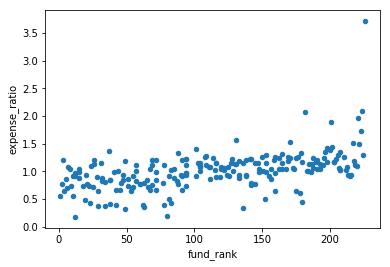

In [139]:
full_funds.plot.scatter('fund_rank', 'expense_ratio')

In [151]:
full_funds['total_assets'] = full_funds['total_assets'].str.replace('$','').str.replace('B','').str.replace('M','').astype(float)
full_funds['total_assets'].head()



AttributeError: Can only use .str accessor with string values, which use np.object_ dtype in pandas

In [154]:
full_funds['total_assets'].head()

0      4.02
1    506.10
2    389.56
3    228.65
4      7.89
Name: total_assets, dtype: float64

In [170]:
full_funds.loc[full_funds['total_assets'] < 100.0, 'total_assets'] = full_funds['total_assets']*100
print(full_funds['total_assets'].head())

0    4020.00
1     506.10
2     389.56
3     228.65
4    7890.00
Name: total_assets, dtype: float64


In [ ]:
full_funds['total_assets']

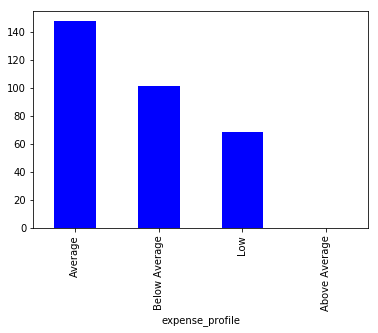

In [157]:
full_funds.groupby('expense_profile')['fund_rank'].mean().sort_values(ascending=False).plot.bar(color='b')

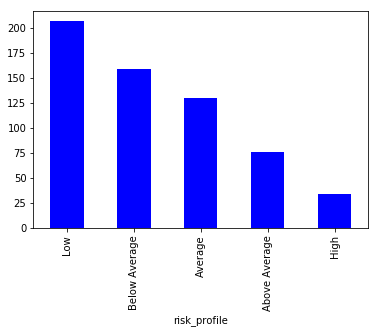

In [158]:
full_funds.groupby('risk_profile')['fund_rank'].mean().sort_values(ascending=False).plot.bar(color='b')

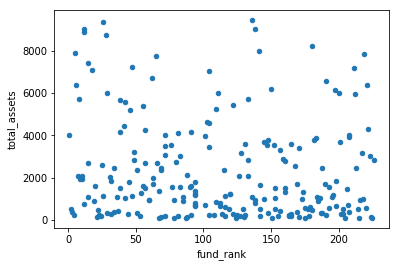

In [171]:
full_funds.plot.scatter('fund_rank', 'total_assets')

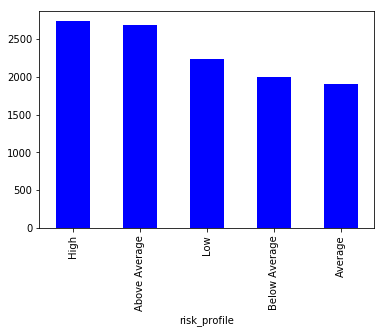

In [172]:
full_funds.groupby('risk_profile')['total_assets'].mean().sort_values(ascending=False).plot.bar(color='b')